# Random Forest Company Data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler


In [100]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [105]:
df.isnull().sum().sum()

0

In [106]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

<AxesSubplot:>

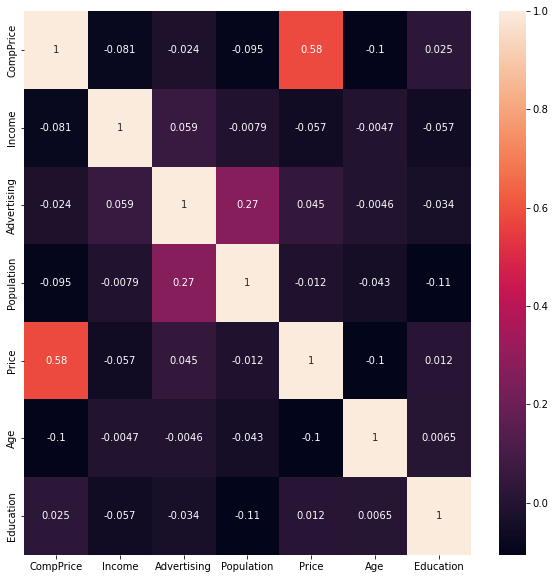

In [110]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

#  Random Forest Model

In [101]:
data = df.copy()

In [102]:
x = 0
for i in df['Sales']:
    if i < np.percentile(df['Sales'] , 25):
        data['Sales'][x] = 'Low'
    elif np.percentile(df['Sales'], 25) <= i < np.percentile(df['Sales'], 75):
        data['Sales'][x] = 'Average'
    else:
        data['Sales'][x] = 'High'
    x += 1
data

C:\Users\parsh\AppData\Local\Temp/ipykernel_8264/3840351571.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'High'
C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Average,139,23,3,37,120,Medium,55,11,No,Yes
397,Average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Average,100,79,7,284,95,Bad,50,12,Yes,Yes


In [113]:
X = data.iloc[:,1:11]
y = data.iloc[:,:1]

## Label Encoding

In [33]:
label_encoder = preprocessing.LabelEncoder()

In [40]:
# Label Encoding
X['ShelveLoc']= label_encoder.fit_transform(X['ShelveLoc'])  # Bad =0   Good = 1   Medium = 2
X['Urban']= label_encoder.fit_transform(X['Urban'])          # YES = 1  No =0
X['US']= label_encoder.fit_transform(X['US'])                # YES = 1  No =0

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [42]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [43]:
X_scaled

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [45]:
kfold = KFold(10)
accuracy = []
for i in range (1,201):
    forest = RandomForestClassifier(random_state = 42, n_estimators = i)
    result = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(result))
accuracy

[0.5675000000000001,
 0.5750000000000001,
 0.6325000000000001,
 0.6024999999999999,
 0.595,
 0.615,
 0.625,
 0.605,
 0.6375000000000001,
 0.63,
 0.645,
 0.6375000000000001,
 0.6499999999999999,
 0.6375000000000001,
 0.6575,
 0.645,
 0.6399999999999999,
 0.6425,
 0.6499999999999999,
 0.6449999999999999,
 0.66,
 0.6525000000000001,
 0.6575,
 0.64,
 0.635,
 0.64,
 0.6375,
 0.6375,
 0.6475000000000001,
 0.6475,
 0.65,
 0.655,
 0.66,
 0.6575,
 0.655,
 0.655,
 0.6625000000000001,
 0.6675000000000001,
 0.6700000000000002,
 0.665,
 0.665,
 0.665,
 0.6675000000000001,
 0.6725000000000001,
 0.6700000000000002,
 0.6675000000000001,
 0.6675000000000001,
 0.66,
 0.6699999999999999,
 0.6700000000000002,
 0.6775,
 0.6725,
 0.67,
 0.6625,
 0.6699999999999999,
 0.665,
 0.665,
 0.6625,
 0.67,
 0.6699999999999999,
 0.6699999999999999,
 0.6725,
 0.675,
 0.675,
 0.6725000000000001,
 0.6725000000000001,
 0.675,
 0.6675000000000001,
 0.6725,
 0.6799999999999999,
 0.6675,
 0.6725000000000001,
 0.67,
 0.679999

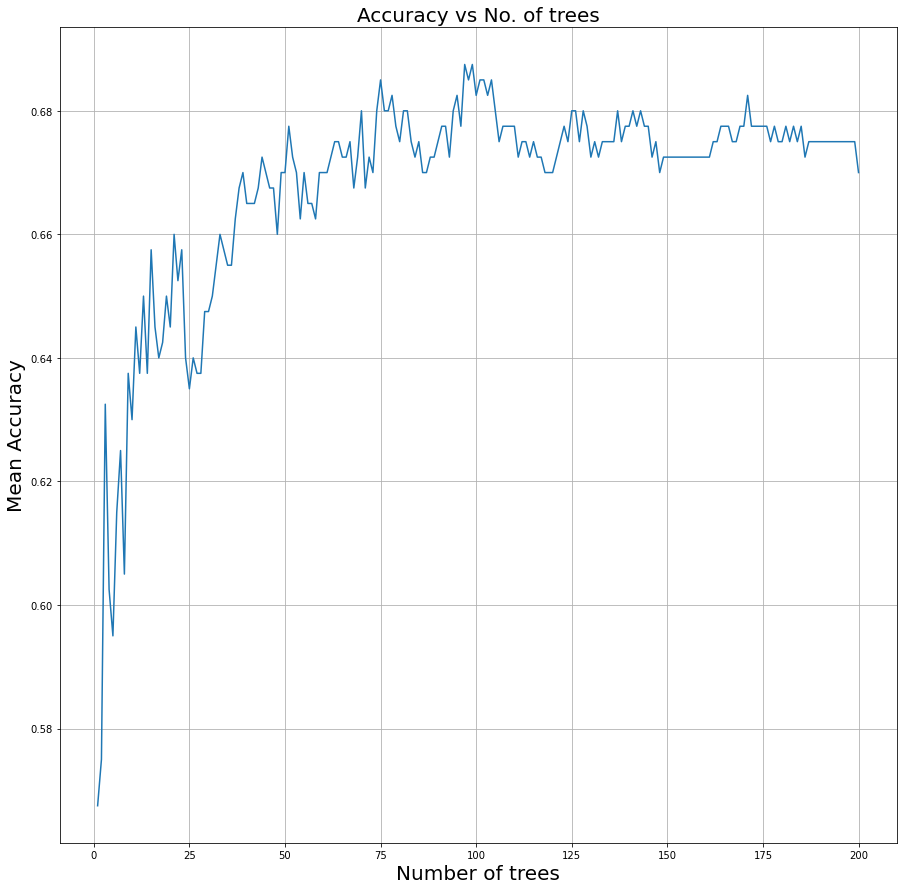

In [48]:
plt.figure(figsize = (15,15))
plt.plot(range(1,201), accuracy)
plt.xlabel('Number of trees', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Accuracy vs No. of trees', fontsize = 20)
plt.grid()
plt.show()


In [51]:
np.max(accuracy)

0.6875000000000001

In [52]:
n_est_ideal = accuracy.index(max(accuracy))

# Model

In [64]:
model = RandomForestClassifier(n_estimators = n_est_ideal, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=96, random_state=42)

In [67]:
predictions = model.predict(X_test)
np.mean(predictions == y_test)

0.65

In [68]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[30,  5,  5],
       [11, 12,  0],
       [ 7,  0, 10]], dtype=int64)

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


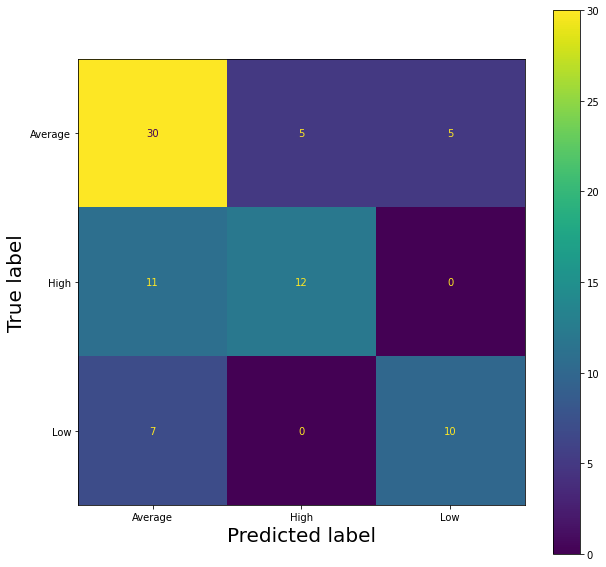

In [69]:
fig, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(model, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted label', fontsize = 20)
ax.set_ylabel('True label', fontsize = 20)
plt.show()

In [72]:
pred_train = model.predict(X_train)

In [74]:
pred_test = model.predict(X_test)

In [77]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [78]:
df_t

,Actual,Predicted
209,Low,Low
280,Low,Average
33,Average,High
210,Low,Low
93,Average,Average
...,...,...
246,Average,Low
227,Average,Average
369,High,Average
176,Average,Average


In [79]:
model.feature_importances_

array([0.12282975, 0.10502428, 0.09835956, 0.11885234, 0.20749064,
       0.11082677, 0.13439589, 0.06423122, 0.01729188, 0.02069766])

In [87]:
feature_importance = pd.DataFrame({'feature': list(X.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [88]:
feature_importance

,feature,importance
4,Price,0.207491
6,Age,0.134396
0,CompPrice,0.122830
3,Population,0.118852
5,ShelveLoc,0.110827
1,Income,0.105024
2,Advertising,0.098360
7,Education,0.064231
9,US,0.020698
8,Urban,0.017292


In [94]:
max_importance = np.max(feature_importance["importance"])
max_importance

0.20749063504911908

# In cloth manufacturing company Price segment or attributes is causes high sale